<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Features_Determination_teste_001_dez_03_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install mahotas

In [0]:
# proximas etapas que falta : dividir a foto em 10x10 e aplicar o mahotas em cada foto
# encontrar 
# GLCM?
# COLOCAR MAIS VARIAVEIS NAS FOTOS
# VER QUAIS PARAMETROS USAR PARA CALCULAR O PSD (particle size distribution)
# GERAR AS IMAGENS ARTIFICIAIS

In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
import re
%matplotlib inline

In [32]:
!wget http://ftp.feq.ufu.br/ubirajara/GrBuInd.zip
Transfere='GrBuInd.zip'

--2019-12-03 17:57:36--  http://ftp.feq.ufu.br/ubirajara/GrBuInd.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497627 (486K) [application/zip]
Saving to: ‘GrBuInd.zip’

GrBuInd.zip         100%[===================>] 485.96K   297KB/s    in 1.6s    

2019-12-03 17:57:38 (297 KB/s) - ‘GrBuInd.zip’ saved [497627/497627]



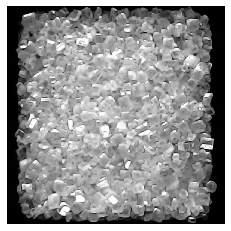

In [33]:
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
# all images are load in variable x...
FILE=Transfere
img_name=[]
xw=[]
ww=[]

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #xw.append(cv2.imread(name))
        xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

nrow=len(img_name)
ncol=Size*Size
pw=np.zeros((nrow,ncol))
#pw=[]
for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()

plt.axis("off")
plt.imshow(ww[0], cmap = "gray")

In [34]:
print(img_name)

['Q6-2-1.jpg', 'Q6-2-1-B1.jpg', 'Q6-2-1-B2.jpg', 'Q6-2-1-B3.jpg', 'Q6-2-1-B4.jpg', 'Q6-2-1-B5.jpg', 'Q6-2-1-B6.jpg', 'Q6-2-1-B7.jpg', 'Q6-2-1-B8.jpg', 'Q6-2-1-B9.jpg', 'Q6-2-1-B10.jpg', 'Q6-2-1-G1.jpg', 'Q6-2-1-G2.jpg', 'Q6-2-1-G3.jpg', 'Q6-2-1-G4.jpg', 'Q6-2-1-G5.jpg', 'Q6-2-1-G6.jpg', 'Q6-2-1-G7.jpg', 'Q6-2-1-G8.jpg', 'Q6-2-1-G9.jpg', 'Q6-2-1-G10.jpg', 'Q6-2-1-I1.jpg', 'Q6-2-1-I2.jpg', 'Q6-2-1-I3.jpg', 'Q6-2-1-I4.jpg', 'Q6-2-1-I5.jpg', 'Q6-2-1-I6.jpg', 'Q6-2-1-I7.jpg', 'Q6-2-1-I8.jpg', 'Q6-2-1-I9.jpg', 'Q6-2-1-I10.jpg', 'Q6-2-2.jpg', 'Q6-2-2-B1.jpg', 'Q6-2-2-B2.jpg', 'Q6-2-2-B3.jpg', 'Q6-2-2-B4.jpg', 'Q6-2-2-B5.jpg', 'Q6-2-2-B6.jpg', 'Q6-2-2-B7.jpg', 'Q6-2-2-B8.jpg', 'Q6-2-2-B9.jpg', 'Q6-2-2-B10.jpg', 'Q6-2-2-G1.jpg', 'Q6-2-2-G2.jpg', 'Q6-2-2-G3.jpg', 'Q6-2-2-G4.jpg', 'Q6-2-2-G5.jpg', 'Q6-2-2-G6.jpg', 'Q6-2-2-G7.jpg', 'Q6-2-2-G8.jpg', 'Q6-2-2-G9.jpg', 'Q6-2-2-G10.jpg', 'Q6-2-2-I1.jpg', 'Q6-2-2-I2.jpg', 'Q6-2-2-I3.jpg', 'Q6-2-2-I4.jpg', 'Q6-2-2-I5.jpg', 'Q6-2-2-I6.jpg', 'Q6-2-2-I7.jpg

In [37]:

subs = 'B'
# using re + search() 
# to get string with substring  
Buraco = [x for x in img_name if re.search(subs, x)] 
# printing result  
for i in Buraco:
  print(i)
#print ("All strings with given substring are : " + str(res)) 

Q6-2-1-B1.jpg
Q6-2-1-B2.jpg
Q6-2-1-B3.jpg
Q6-2-1-B4.jpg
Q6-2-1-B5.jpg
Q6-2-1-B6.jpg
Q6-2-1-B7.jpg
Q6-2-1-B8.jpg
Q6-2-1-B9.jpg
Q6-2-1-B10.jpg
Q6-2-2-B1.jpg
Q6-2-2-B2.jpg
Q6-2-2-B3.jpg
Q6-2-2-B4.jpg
Q6-2-2-B5.jpg
Q6-2-2-B6.jpg
Q6-2-2-B7.jpg
Q6-2-2-B8.jpg
Q6-2-2-B9.jpg
Q6-2-2-B10.jpg
Q6-3-1-B1.jpg
Q6-3-1-B2.jpg
Q6-3-1-B3.jpg
Q6-3-1-B4.jpg
Q6-3-1-B5.jpg
Q6-3-1-B6.jpg
Q6-3-1-B7.jpg
Q6-3-1-B8.jpg
Q6-3-1-B9.jpg
Q6-3-1-B10.jpg
Q6-3-2-B1.jpg
Q6-3-2-B2.jpg
Q6-3-2-B3.jpg
Q6-3-2-B4.jpg
Q6-3-2-B5.jpg
Q6-3-2-B6.jpg
Q6-3-2-B7.jpg
Q6-3-2-B8.jpg
Q6-3-2-B9.jpg
Q6-3-2-B10.jpg


In [38]:
subs = 'G'
# using re + search() 
# to get string with substring  
Grao = [x for x in img_name if re.search(subs, x)] 
# printing result  
for i in Grao:
  print(i)
#print ("All strings with given substring are : " + str(res)) 

Q6-2-1-G1.jpg
Q6-2-1-G2.jpg
Q6-2-1-G3.jpg
Q6-2-1-G4.jpg
Q6-2-1-G5.jpg
Q6-2-1-G6.jpg
Q6-2-1-G7.jpg
Q6-2-1-G8.jpg
Q6-2-1-G9.jpg
Q6-2-1-G10.jpg
Q6-2-2-G1.jpg
Q6-2-2-G2.jpg
Q6-2-2-G3.jpg
Q6-2-2-G4.jpg
Q6-2-2-G5.jpg
Q6-2-2-G6.jpg
Q6-2-2-G7.jpg
Q6-2-2-G8.jpg
Q6-2-2-G9.jpg
Q6-2-2-G10.jpg
Q6-3-1-G1.jpg
Q6-3-1-G2.jpg
Q6-3-1-G3.jpg
Q6-3-1-G4.jpg
Q6-3-1-G5.jpg
Q6-3-1-G6.jpg
Q6-3-1-G7.jpg
Q6-3-1-G8.jpg
Q6-3-1-G9.jpg
Q6-3-1-G10.jpg
Q6-3-2-G1.jpg
Q6-3-2-G2.jpg
Q6-3-2-G3.jpg
Q6-3-2-G4.jpg
Q6-3-2-G5.jpg
Q6-3-2-G6.jpg
Q6-3-2-G7.jpg
Q6-3-2-G8.jpg
Q6-3-2-G9.jpg
Q6-3-2-G10.jpg


In [39]:
subs = 'I'
# using re + search() 
# to get string with substring  
Indef = [x for x in img_name if re.search(subs, x)] 
# printing result  
for i in Indef:
  print(i)
#print ("All strings with given substring are : " + str(res)) 

Q6-2-1-I1.jpg
Q6-2-1-I2.jpg
Q6-2-1-I3.jpg
Q6-2-1-I4.jpg
Q6-2-1-I5.jpg
Q6-2-1-I6.jpg
Q6-2-1-I7.jpg
Q6-2-1-I8.jpg
Q6-2-1-I9.jpg
Q6-2-1-I10.jpg
Q6-2-2-I1.jpg
Q6-2-2-I2.jpg
Q6-2-2-I3.jpg
Q6-2-2-I4.jpg
Q6-2-2-I5.jpg
Q6-2-2-I6.jpg
Q6-2-2-I7.jpg
Q6-2-2-I8.jpg
Q6-2-2-I9.jpg
Q6-2-2-I10.jpg
Q6-3-1-I1.jpg
Q6-3-1-I2.jpg
Q6-3-1-I3.jpg
Q6-3-1-I4.jpg
Q6-3-1-I5.jpg
Q6-3-1-I6.jpg
Q6-3-1-I7.jpg
Q6-3-1-I8.jpg
Q6-3-1-I9.jpg
Q6-3-1-I10.jpg
Q6-3-2-I1.jpg
Q6-3-2-I2.jpg
Q6-3-2-I3.jpg
Q6-3-2-I4.jpg
Q6-3-2-I5.jpg
Q6-3-2-I6.jpg
Q6-3-2-I7.jpg
Q6-3-2-I8.jpg
Q6-3-2-I9.jpg
Q6-3-2-I10.jpg
